In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler
from torch.autograd import Variable

batch_size = 10

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
df = pd.read_csv("datasets/creditcardfraud/creditcard.csv", sep=",", index_col=None)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,1.642058,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [5]:
anomalies = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

anomalies.shape, normal.shape


((492, 31), (284315, 31))

In [88]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    

data_set = pd.concat([normal[:50000], anomalies])

x_train, x_test = train_test_split(data_set, test_size = 0.4, random_state = 42)

x_train = x_train.sort_values(by=['Time'])
x_test = x_test.sort_values(by=['Time'])

y_train = x_train["Class"]
y_test = x_test["Class"]

x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)

x_train.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7,-1.996436,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190107
14,-1.996330,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,-0.118142
38,-1.995972,0.996370,-0.122589,0.546819,0.706580,0.134560,1.156995,-0.294561,0.407429,0.337863,...,-0.203461,-0.076302,0.108867,0.162231,-0.575624,0.109795,0.373813,0.050552,0.005106,-0.271149
53,-1.995825,1.095525,-0.116085,1.397912,1.497547,-1.049124,0.072839,-0.723802,0.287532,0.996327,...,-0.275035,-0.033234,0.093262,0.089498,0.361261,0.250963,-0.378280,0.081024,0.034227,-0.344873
62,-1.995720,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.191050,0.011106,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,-0.216775
67,-1.995656,-0.948896,0.248414,2.956914,2.813750,0.145539,-0.027353,0.133702,-0.307535,-0.125244,...,-0.056186,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,-0.350231
86,-1.995425,-0.773450,0.853112,0.818254,-0.236070,0.803463,-1.438728,0.799479,-0.007989,-0.761090,...,-0.100858,0.035362,-0.116890,-0.178926,0.400155,-0.026231,0.165156,0.027762,0.132980,-0.350191
89,-1.995341,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,...,2.442782,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,4.212665
103,-1.995130,-0.608027,0.306694,1.473004,1.191127,0.021265,0.888442,1.190491,0.042147,-0.446426,...,0.374086,0.046506,0.165163,0.063974,-0.333792,0.131776,-0.217692,-0.082183,-0.116730,0.320688
123,-1.994941,-0.291241,1.515688,1.514355,2.518365,0.583648,0.425561,0.598690,0.056754,-1.475621,...,0.348232,-0.252659,-0.613055,-0.126407,-0.636697,-0.255688,0.019571,0.382581,0.194255,-0.334518


In [89]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(30295, 30)
y_train:(30295,)

x_test:(20197, 30)
y_test:(20197,)



In [90]:
x_train = np.array(x_train).reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0], 1,  x_test.shape[1])
# input_shape = (1, x_train.shape[1])

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [91]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
# print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(30295, 1, 30)
y_train:(30295,)

x_test:(20197, 1, 30)
y_test:(20197,)



In [92]:
original_dim  = x_train.shape[2]

print(original_dim)

input_shape = (original_dim, 1)
intermediate_dim = 15
# batch_size = original_dim
latent_dim = 2
num_epochs = 400
learning_rate = 0.002

reconstruction_function = nn.MSELoss(size_average=False)

30


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [93]:
class VAE_TCN(nn.Module):
    def __init__(self):
        super(VAE_TCN, self).__init__()
        
        
#         self.dense_0 = nn.Linear(original_dim, original_dim)
        self.conv_1 = nn.Conv1d(1, 28, kernel_size=2, dilation=1, padding=((2-1) * 1))
        self.conv_2 = nn.Conv1d(28, 128, kernel_size=2, dilation=2, padding=((2-1) * 2))
        self.dense_1 = nn.Linear(30*128  , 28)
        self.dense_2 = nn.Linear(28, 15)
        self.z_mean = nn.Linear(15, 2)
        self.z_log_var = nn.Linear(15, 2)

#         self.z = self.sampling(z_mean, z_log_var)

#         self.dense_3 = nn.Linear(2, 28)
        self.conv_3 = nn.Conv1d(1, 128, kernel_size=2, dilation=1, padding=((2-1) * 1))
        self.conv_4 = nn.Conv1d(128, 28, kernel_size=2, dilation=2, padding=((2-1) * 2))

        self.dense_4 = nn.Linear(2*28, original_dim)


#         x = Dense(intermediate_dim, activation='relu')(latent_inputs)
#         outputs = Dense(original_dim, activation='sigmoid')(x)
#         outputs = Reshape((original_dim, 1))(outputs)

        

    def sampling(self, z_mean, z_log_var ):
        """Reparameterization trick by sampling from an isotropic unit Gaussian.
        # Arguments
            args (tensor): mean and log of variance of Q(z|X)
        # Returns
            z (tensor): sampled latent vector
        """
#         z_mean, z_log_var = torch.Tensor(z_mean).float(), torch.Tensor(z_log_var).float()
        batch = list(z_mean.shape)[0]
        dim =list(z_mean.shape)[1]
        # by default, random_normal has mean = 0 and std = 1.0
        epsilon = torch.Tensor(np.random.normal(size=(batch, dim))).cuda().float()
        return z_mean + torch.exp(0.5 * z_log_var) * epsilon

    def encode(self, x):
#         x = self.dense_0(x)
        x = self.conv_1(x)
        x = x[:, :, :-self.conv_1.padding[0]]
        x = F.relu(x)
        x = F.dropout(x, 0.05)
        x = self.conv_2(x)
        x = x[:, :, :-self.conv_2.padding[0]]
        x = F.relu(x)
        x = F.dropout(x, 0.05)
        
        
#         x = self.conv_3(x)
#         x = x[:, :, :-self.conv_3.padding[0]]
#         x = F.relu(x)
#         x = F.dropout(x, 0.05)
#         x = self.conv_4(x)
#         x = x[:, :, :-self.conv_4.padding[0]]
#         x = F.relu(x)
#         x = F.dropout(x, 0.05)
        x = x.view(-1, original_dim*128)
        x = F.relu(self.dense_1(x))
        x = self.dense_2(x)
        x = F.relu(x)
        
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        
        
        z = self.sampling(z_mean, z_log_var)
        return z_mean, z_log_var#, F.log_softmax(x, dim=1)

    
    def decode(self, z):
#         z = self.dense_3(z)
#         z = F.relu(z)
#         z = self.conv_5(z)
#         z = z[:, :, :-self.conv_5.padding[0]]
#         z = F.relu(x)
#         z = F.dropout(x, 0.05)
#         z = self.conv_6(z)
#         z = z[:, :, :-self.conv_6.padding[0]]
#         z = F.relu(z)
#         z = F.dropout(z, 0.05)
        z = z.unsqueeze(-2)
    
        z = self.conv_3(z)
        z = z[:, :, :-self.conv_3.padding[0]]
        z = F.relu(z)
        
        z = self.conv_4(z)
        z = z[:, :, :-self.conv_4.padding[0]]
        z = F.relu(z)
        
        z = F.dropout(z, 0.05)
        z = z.view(-1, 2*28)
        z = self.dense_4(z)
#         z = z.unsqueeze(-2)
        print(z.shape)
        return F.sigmoid(z)
        
    def forward(self, x):
        z_mean, z_log_var = self.encode(x)
        z = self.sampling(z_mean, z_log_var)
        decoder_output = self.decode(z)
        return decoder_output, z_mean, z_log_var

In [94]:
def vae_loss(pred_x, x, z_mean, z_log_var):
#     reconstruction_loss = reconstruction_function(pred_x, x)
    reconstruction_loss = torch.mean(torch.pow(pred_x - x, 2))
#     print(reconstruction_loss)
    
    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - torch.pow(z_mean, 2) - torch.exp(z_log_var)
    kl_loss = torch.sum(kl_loss, dim=-1)
    kl_loss *= -0.5
    vae_loss = torch.mean(reconstruction_loss + kl_loss)
#     vae.add_loss(vae_loss)
    return vae_loss
    
    
# def vae_loss_2(recon_x, x, mu, logvar):
#     BCE = reconstruction_function(recon_x, x)  # mse loss
#     # loss = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
#     KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
#     KLD = torch.sum(KLD_element).mul_(-0.5)
#     # KL divergence
#     return BCE + KLD

In [95]:
def train(model, device, x_train, optimizer, epoch, save_dir='VAE_TCN_PyTorch.ckpt'):
    total_step = len(x_train)
    
    x_train = torch.Tensor(x_train).cuda().float()
#     y_train = torch.Tensor(y_train).cuda().long()

    x_train.to(device)
#     y_train.to(device)

    # Forward pass
    output, z_mean, z_log_var = model(x_train)
#     loss = criterion(output, y_train.squeeze(1))
    loss = vae_loss(output, x_train.squeeze(1), z_mean, z_log_var)
    

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    torch.save(model.state_dict(), save_dir)

In [96]:
from sklearn.metrics import roc_auc_score

def test(model, device, x_test, y_test):
    
    model.eval()
    with torch.no_grad():
        x_test = torch.Tensor(x_test).cuda().float()
        
        y_test = np.array(y_test)
        y_test = torch.Tensor(y_test).cuda().float()
        
        x_test = x_test.to(device)
#         y_test= x_test
        y_test = y_test.to(device)
#         y_test = y_test.squeeze(1)

        preds, z_mean, z_log_Var = model(x_test)
        
#         preds = np.array(preds)
        preds = preds.detach().cpu().numpy()
        print(preds.shape, x_test.shape)
#         y_test = y_test.detach().cpu().numpy()
        x_test= x_test.detach().cpu().numpy().reshape(x_test.shape[0], x_test.shape[-1])
    
        pred_mse = np.mean(np.power(preds - x_test, 2), axis=1, keepdims=False)
        pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': y_test})

        print(pred_error_df.quantile(0.75), pred_error_df.quantile(0.25))
        threshold = 15.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
        groups = pred_error_df.groupby('true_class')
        fig, ax = plt.subplots()

        for name, group in groups:
            ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
                    label= "Fraud" if name == 1 else "Normal")
        ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
        ax.legend()
        plt.title("Reconstruction error for different classes")
        plt.ylabel("Reconstruction error")
        plt.xlabel("Data point index")
        plt.show();
        
        import seaborn as sns
        from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                                     roc_curve, recall_score, classification_report, f1_score,
                                     precision_recall_fscore_support)

        LABELS = ["Normal", "Fraud"]

        y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
        conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

        plt.figure(figsize=(12, 12))
        sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
        plt.title("Confusion matrix")
        plt.ylabel('True class')
        plt.xlabel('Predicted class')
        plt.show()
        
        counter = []

        for f in range(0, len(pred_error_df)):
            if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
                counter.append(1)
            else:
                counter.append(0)
                
        auc = roc_auc_score( counter, y_test)
        print("AUC: {:.2%}".format (auc))
        


In [97]:
model = VAE_TCN().to(device)
# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print(model)

VAE_TCN(
  (conv_1): Conv1d(1, 28, kernel_size=(2,), stride=(1,), padding=(1,))
  (conv_2): Conv1d(28, 128, kernel_size=(2,), stride=(1,), padding=(2,), dilation=(2,))
  (dense_1): Linear(in_features=3840, out_features=28, bias=True)
  (dense_2): Linear(in_features=28, out_features=15, bias=True)
  (z_mean): Linear(in_features=15, out_features=2, bias=True)
  (z_log_var): Linear(in_features=15, out_features=2, bias=True)
  (conv_3): Conv1d(1, 128, kernel_size=(2,), stride=(1,), padding=(1,))
  (conv_4): Conv1d(128, 28, kernel_size=(2,), stride=(1,), padding=(2,), dilation=(2,))
  (dense_4): Linear(in_features=56, out_features=30, bias=True)
)


In [98]:


## Training phase

for epoch in range(0, num_epochs):
    train(model, device, x_train, optimizer, epoch)


torch.Size([30295, 30])
tensor(1.5658, device='cuda:0', grad_fn=<MeanBackward1>)


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1/400, Loss: 47.0016
torch.Size([30295, 30])
tensor(1.5602, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 2/400, Loss: 46.8541
torch.Size([30295, 30])
tensor(1.5542, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 3/400, Loss: 46.6336
torch.Size([30295, 30])
tensor(1.5470, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 4/400, Loss: 46.4393
torch.Size([30295, 30])
tensor(1.5394, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 5/400, Loss: 46.2074
torch.Size([30295, 30])
tensor(1.5304, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 6/400, Loss: 45.9355
torch.Size([30295, 30])
tensor(1.5190, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 7/400, Loss: 45.6033
torch.Size([30295, 30])
tensor(1.5063, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 8/400, Loss: 45.2664
torch.Size([30295, 30])
tensor(1.4925, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 9/400, Loss: 44.8260
torch.Size([30295, 30])
tensor(1.4788, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 10/400, Loss: 44.4078


Epoch 77/400, Loss: 39.0706
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 78/400, Loss: 39.0705
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 79/400, Loss: 39.0707
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 80/400, Loss: 39.0702
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 81/400, Loss: 39.0707
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 82/400, Loss: 39.0701
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 83/400, Loss: 39.0704
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 84/400, Loss: 39.0703
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 85/400, Loss: 39.0703
torch.Size([30295, 30])
tensor(1.3023, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 86/400, Loss:

Epoch 152/400, Loss: 39.0678
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 153/400, Loss: 39.0682
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 154/400, Loss: 39.0673
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 155/400, Loss: 39.0678
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 156/400, Loss: 39.0677
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 157/400, Loss: 39.0674
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 158/400, Loss: 39.0668
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 159/400, Loss: 39.0674
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 160/400, Loss: 39.0680
torch.Size([30295, 30])
tensor(1.3022, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 161/

Epoch 227/400, Loss: 39.0603
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 228/400, Loss: 39.0630
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 229/400, Loss: 39.0615
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 230/400, Loss: 39.0620
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 231/400, Loss: 39.0623
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 232/400, Loss: 39.0609
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 233/400, Loss: 39.0616
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 234/400, Loss: 39.0614
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 235/400, Loss: 39.0613
torch.Size([30295, 30])
tensor(1.3018, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 236/

Epoch 302/400, Loss: 38.8783
torch.Size([30295, 30])
tensor(1.2888, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 303/400, Loss: 38.8834
torch.Size([30295, 30])
tensor(1.2885, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 304/400, Loss: 38.8752
torch.Size([30295, 30])
tensor(1.2883, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 305/400, Loss: 38.8670
torch.Size([30295, 30])
tensor(1.2882, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 306/400, Loss: 38.8679
torch.Size([30295, 30])
tensor(1.2876, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 307/400, Loss: 38.8630
torch.Size([30295, 30])
tensor(1.2872, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 308/400, Loss: 38.8594
torch.Size([30295, 30])
tensor(1.2870, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 309/400, Loss: 38.8524
torch.Size([30295, 30])
tensor(1.2874, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 310/400, Loss: 38.8585
torch.Size([30295, 30])
tensor(1.2867, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 311/

Epoch 377/400, Loss: 38.7227
torch.Size([30295, 30])
tensor(1.2814, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 378/400, Loss: 38.7229
torch.Size([30295, 30])
tensor(1.2811, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 379/400, Loss: 38.7234
torch.Size([30295, 30])
tensor(1.2812, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 380/400, Loss: 38.7287
torch.Size([30295, 30])
tensor(1.2814, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 381/400, Loss: 38.7266
torch.Size([30295, 30])
tensor(1.2818, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 382/400, Loss: 38.7265
torch.Size([30295, 30])
tensor(1.2816, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 383/400, Loss: 38.7248
torch.Size([30295, 30])
tensor(1.2811, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 384/400, Loss: 38.7238
torch.Size([30295, 30])
tensor(1.2804, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 385/400, Loss: 38.7187
torch.Size([30295, 30])
tensor(1.2807, device='cuda:0', grad_fn=<MeanBackward1>)
Epoch 386/

torch.Size([20197, 30])


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(20197, 30) torch.Size([20197, 1, 30])
reconstruction_error    0.965303
true_class              0.000000
Name: 0.75, dtype: float64 reconstruction_error    0.439402
true_class              0.000000
Name: 0.25, dtype: float64


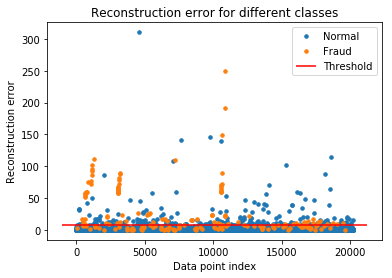

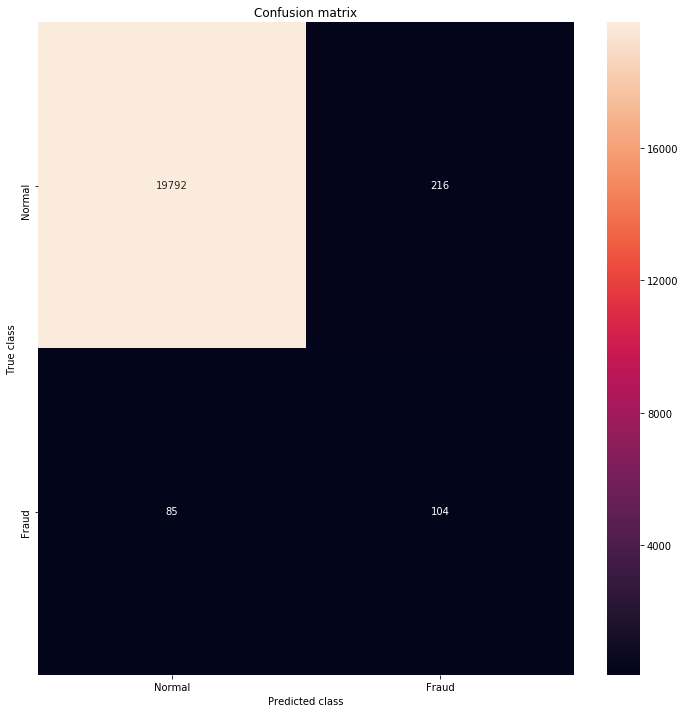

AUC: 66.04%


In [99]:
## Testing phase

test(model, device, x_test, y_test)

torch.Size([100000, 30])
(100000, 30) torch.Size([100000, 1, 30])
reconstruction_error    0.935838
true_class              0.000000
Name: 0.75, dtype: float64 reconstruction_error    0.401263
true_class              0.000000
Name: 0.25, dtype: float64


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


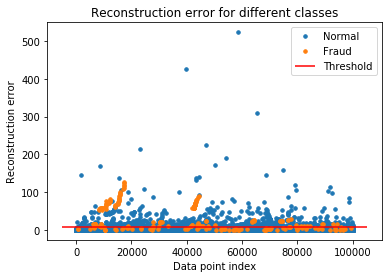

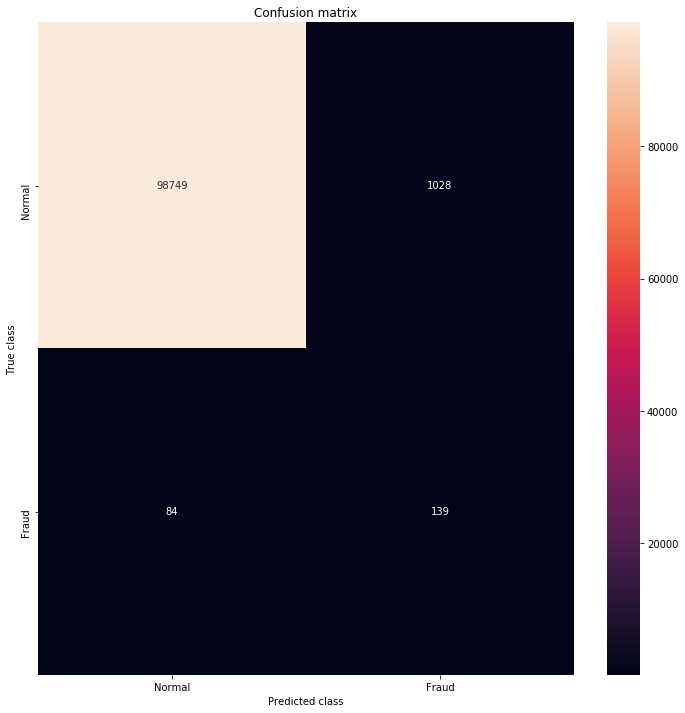

AUC: 55.91%


In [100]:
## Testing phase

points = np.array(df.drop('Class', axis=1))[:100000]
truths = df['Class'][:100000]

points = points.reshape(points.shape[0], 1, points.shape[1])


test(model, device, points, truths)

In [206]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, truths)
print("AUC: {:.2%}".format (auc))

NameError: name 'counter' is not defined

In [46]:
torch.cuda.empty_cache

<function torch.cuda.empty_cache()>